In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [65]:
df = pd.read_csv("creditcard.csv")
df.head()

In [ ]:
df.shape

(284807, 31)

In [ ]:
X = df.drop(columns=['Time','Amount','Class'])
y = df['Class']

In [ ]:
df.shape

(284807, 31)

In [ ]:
# Target Value Count 
# 0 not fraud
# 1 for Fraud detection
y.value_counts()
# 284315 not found fraud detection
# 1       492 mean fraud detection

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# data is in the categorical form so we apply logistic Regression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [ ]:
prediction = lr.predict(X)

In [ ]:
simple_lr = pd.DataFrame(prediction)

In [ ]:
simple_lr.value_counts()
# check simple logistic regression fitted and very less  vlaue  fit for detection 

# 0    284459
# 1       348    ,,, orginal 1 values is 492 lr model fit the model with less values 

0    284459
1       348
dtype: int64

In [ ]:
# now we logisticRegreesion apply on our model with tunning the model
# now weighted the data 0 have 1 weightage abd 1 have 2 times watage to get better result
lr = LogisticRegression(class_weight={0:1,1:2})
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
pred1 = lr.predict(X)

In [ ]:
testpred = pd.DataFrame(pred1)

In [ ]:
testpred.value_counts()
# 1       437  have maximum values as campared to simple logistic Regression
# it is very difficult to answer what values we select for better training
# so we us for loop and get the best result

0    284370
1       437
dtype: int64

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight': [{0: 1, 1: number} for number in range(0,10)]},
    cv=5
)

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 0}, {0: 1, 1: 1},
                                          {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}, {0: 1, 1: 7},
                                          {0: 1, 1: 8}, {0: 1, 1: 9}]})

In [ ]:
predicted_y= grid.predict(X)

In [ ]:
# to view the best values 
pd.DataFrame(grid.cv_results_)
# {0: 1, 1: 4}  given 	rank_test_score 1 values means best combination for model training
# {0: 1, 1: 6}   given 	rank_test_score 1 values means best combination for model training

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.545179,0.826455,0.022828,0.009287,"{0: 1, 1: 0}","{'class_weight': {0: 1, 1: 0}}",0.998262,0.998262,0.998280,0.998280,0.998280,0.998273,0.000009,10
1,6.383583,0.803651,0.039246,0.036146,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,9
2,5.941760,1.420312,0.028259,0.016596,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,7
3,5.281379,0.506165,0.028469,0.007083,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
4,4.980588,0.767165,0.022549,0.009069,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
5,4.618074,0.782745,0.019638,0.002364,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
6,4.925845,0.498705,0.034267,0.011250,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
7,5.642792,0.425204,0.032394,0.018758,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5
8,6.019680,1.016276,0.041534,0.021343,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.998929,0.999649,0.998841,0.999438,0.999192,0.999210,0.000303,6
9,7.092127,0.692120,0.043377,0.033878,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.998894,0.999649,0.998718,0.999368,0.999192,0.999164,0.000331,8


In [ ]:
pred = pd.DataFrame(predicted_y)

In [ ]:
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
pred.value_counts()

0    284331
1       476
dtype: int64

In [ ]:
# Actual verses machine prediction
precision_score(y,predicted_y)

0.8109243697478992

In [ ]:
recall_score(y,predicted_y)

0.7845528455284553

In [ ]:
f1_score(y,predicted_y)

0.7975206611570248

In [ ]:
confusion_matrix(y,predicted_y)

array([[284225,     90],
       [   106,    386]], dtype=int64)

<AxesSubplot: >

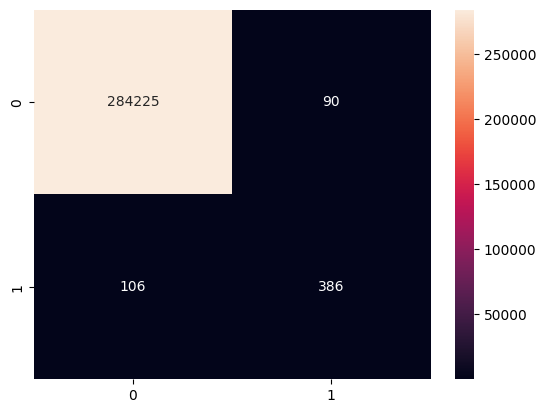

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y,predicted_y),annot=True,fmt='d')